In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *
from plot_utils import *
configure_plot(plt)

In [3]:
lhs_output_sim_files = []
for i in range(2000):
    fname = '/home/aaj54/group-testing/notebooks/apr_29_scenarios/point_{}.dill'.format(i)
    lhs_output_sim_files.append(fname)


In [4]:
scenario_data = load_sim_output(lhs_output_sim_files)
res_results = residential_regression(scenario_data)
res_pessimistic = calculate_pessimistic_scenario(res_results)

# Res Pessimistic Instruction Sensitivity Graph

In [5]:
pess_sens_sim_files = []
for i in np.linspace(-1.1, 1.1, 23):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/pess_res_sensitivity_sims_1624479651/pess_sensitivity/mult_{}.dill'.format(i)
    pess_sens_sim_files.append(fname)

In [6]:
pess_sensitivity_data = load_sim_output(pess_sens_sim_files)
pess_sensitivity_data['mult'] = np.linspace(-1.1, 1.1, 23)
pess_sensitivity_data['z-score'] = [norm.ppf(0.99) * x for x in np.linspace(-1.1, 1.1, 23)]
pess_sensitivity_data['quantile'] = [norm.cdf(norm.ppf(0.99) * x) for x in np.linspace(-1.1, 1.1, 23)]
pess_sensitivity_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90,mult,z-score,quantile
0,0.801274,0.932922,1.160958,0.968485,0.377764,1.739928,1.207737,0.703090,0.093251,2.028585,...,153.1,82.9,103.5,126.2,144.0,157.0,174.0,-1.1,-2.558983,0.005249
1,0.819340,0.939020,1.282689,0.971350,0.376149,1.718116,1.188852,0.693718,0.093865,2.025986,...,159.0,90.9,108.5,144.0,147.0,161.5,177.1,-1.0,-2.326348,0.010000
2,0.837406,0.945118,1.404420,0.974215,0.374534,1.696304,1.169966,0.684346,0.094478,2.023388,...,165.0,99.0,124.5,152.1,150.0,166.0,181.0,-0.9,-2.093713,0.018143
3,0.855472,0.951216,1.526151,0.977080,0.372919,1.674493,1.151081,0.674975,0.095092,2.020789,...,169.0,107.0,140.0,184.8,155.8,171.0,191.2,-0.8,-1.861078,0.031367
4,0.873538,0.957314,1.647882,0.979945,0.371304,1.652681,1.132196,0.665603,0.095705,2.018190,...,172.0,120.0,154.0,220.3,163.9,182.0,205.0,-0.7,-1.628444,0.051715
5,0.891604,0.963412,1.769614,0.982810,0.369689,1.630870,1.113311,0.656231,0.096319,2.015592,...,177.0,138.0,185.5,283.0,170.9,188.5,207.0,-0.6,-1.395809,0.081386
6,0.909670,0.969510,1.891345,0.985675,0.368075,1.609058,1.094426,0.646859,0.096932,2.012993,...,182.0,154.9,211.0,333.5,179.7,199.5,227.2,-0.5,-1.163174,0.122379
7,0.927736,0.975608,2.013076,0.988540,0.366460,1.587246,1.075541,0.637487,0.097546,2.010395,...,188.1,177.5,288.0,447.7,187.8,218.0,248.0,-0.4,-0.930539,0.176046
8,0.945802,0.981706,2.134807,0.991405,0.364845,1.565435,1.056655,0.628115,0.098159,2.007796,...,196.2,215.7,351.0,591.1,201.8,234.0,270.5,-0.3,-0.697904,0.242619
9,0.963868,0.987804,2.256538,0.994270,0.363230,1.543623,1.037770,0.618744,0.098773,2.005197,...,204.0,300.8,596.0,1040.0,222.9,277.0,351.6,-0.2,-0.465270,0.320869


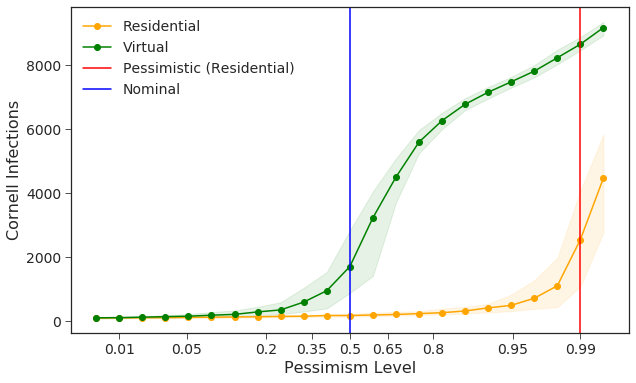

In [7]:
plt.figure(figsize=(10,6))

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('z-score', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')

plt.ylabel('Cornell Infections')
plt.xlabel('Pessimism Level')
# plt.title('Residential Pessimistic Scenario')

plt.axvline(norm.ppf(0.99), label='Pessimistic (Residential)', color='red')
plt.axvline(0, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')
plotting_quantiles = [0.01, 0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 0.99]
plt.xticks([norm.ppf(x) for x in plotting_quantiles], plotting_quantiles)

plt.legend()

plt.show()

# Res Pessimistic Scenario

In [8]:
lhs_output_sim_files = []
for i in range(2000):
    fname = '/home/aaj54/group-testing/notebooks/apr_29_scenarios/point_{}.dill'.format(i)
    lhs_output_sim_files.append(fname)

scenario_data = load_sim_output(lhs_output_sim_files)
res_results = residential_regression(scenario_data)

In [9]:
def normalize_param(param_name, value):
    lower_bound = PARAM_BOUNDS[param_name][0]
    upper_bound = PARAM_BOUNDS[param_name][1]
    return (value - lower_bound) / (upper_bound - lower_bound)

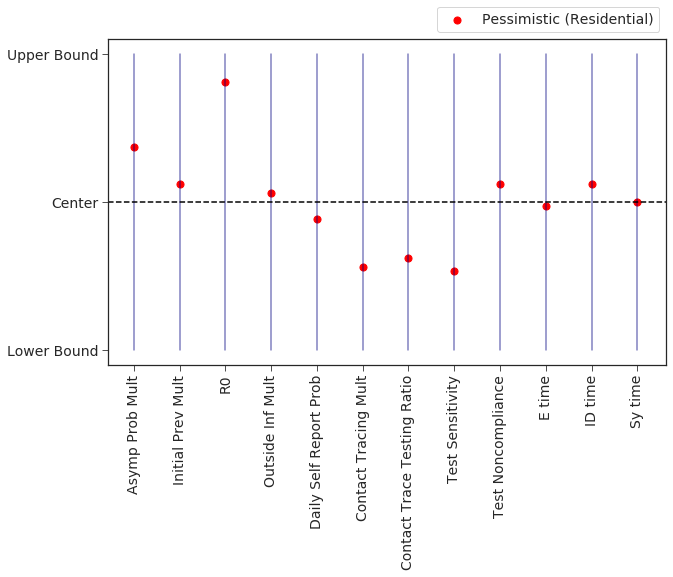

In [10]:
plt.figure(figsize=(10,6))
label = True

for index, param in enumerate(UNCERTAINTY_PARAMS_LIST[:12]):
    plt.plot([index, index], [0,1], color='navy', alpha=0.5)
    if label == True:
        plt.scatter(index, normalize_param(param, res_pessimistic[param]), color='red', label='Pessimistic (Residential)', s=50)
        label = False
    else:
        plt.scatter(index, normalize_param(param, res_pessimistic[param]), color='red', s=50)

plt.axhline(0.5, color='black', ls='--')

plt.xticks(list(range(len(UNCERTAINTY_PARAMS_LIST[:12]))), ['Asymp Prob Mult', 'Initial Prev Mult', 'R0', 'Outside Inf Mult',
                                          'Daily Self Report Prob', 'Contact Tracing Mult', 'Contact Trace Testing Ratio',
                                          'Test Sensitivity', 'Test Noncompliance', 'E time', 'ID time', 'Sy time'])
plt.xticks(rotation = 90)
plt.yticks([0,0.5,1], ['Lower Bound', 'Center', 'Upper Bound'])

# plt.ylim(-0.1,1.1)

# plt.xlabel('Parameter')
# plt.ylabel('Value')

legend = plt.legend(frameon = True, loc='upper right', bbox_to_anchor=(1, 1.12))
# frame = legend.get_frame()
# frame.set_color('white')

# plt.legend()
plt.show()

# Res - Vir Pessimistic Scenario

In [8]:
pess_sens_sim_files = []
for i in np.linspace(-1.1, 1.1, 23):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/pess_res-vir_sensitivity_sims_1624479636/pess_sensitivity/mult_{}.dill'.format(i)
    pess_sens_sim_files.append(fname)

In [9]:
pess_sensitivity_data = load_sim_output(pess_sens_sim_files)
pess_sensitivity_data['mult'] = np.linspace(-1.1, 1.1, 23)
pess_sensitivity_data['z-score'] = [norm.ppf(0.99) * x for x in np.linspace(-1.1, 1.1, 23)]
pess_sensitivity_data['quantile'] = [norm.cdf(norm.ppf(0.99) * x) for x in np.linspace(-1.1, 1.1, 23)]
pess_sensitivity_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90,mult,z-score,quantile
0,1.284142,1.008182,4.033409,0.999582,0.345827,1.435020,0.993684,0.597978,0.098108,2.006713,...,461.6,10489.4,10729.5,10919.7,11557.2,12005.5,12550.4,-1.1,-2.558983,0.005249
1,1.258311,1.007439,3.894008,0.999620,0.347116,1.440927,0.994258,0.598162,0.098280,2.006102,...,405.2,9844.2,10052.5,10277.4,9570.2,10015.0,10527.5,-1.0,-2.326348,0.010000
2,1.232480,1.006695,3.754608,0.999658,0.348404,1.446835,0.994832,0.598346,0.098452,2.005492,...,368.5,9154.3,9410.5,9587.8,7911.3,8245.0,8618.1,-0.9,-2.093713,0.018143
3,1.206649,1.005951,3.615207,0.999696,0.349693,1.452742,0.995406,0.598530,0.098624,2.004882,...,335.0,8563.8,8824.5,8986.6,6358.3,6818.5,7185.0,-0.8,-1.861078,0.031367
4,1.180818,1.005207,3.475806,0.999734,0.350981,1.458649,0.995981,0.598714,0.098796,2.004272,...,313.2,8062.9,8237.5,8446.8,5243.5,5571.5,5862.2,-0.7,-1.628444,0.051715
5,1.154987,1.004463,3.336405,0.999772,0.352269,1.464556,0.996555,0.598897,0.098968,2.003661,...,285.1,7510.4,7754.0,7923.2,4206.8,4460.5,4728.5,-0.6,-1.395809,0.081386
6,1.129155,1.003719,3.197004,0.999810,0.353558,1.470464,0.997129,0.599081,0.099140,2.003051,...,275.1,7111.9,7290.0,7514.0,3333.0,3591.0,3798.5,-0.5,-1.163174,0.122379
7,1.103324,1.002975,3.057603,0.999848,0.354846,1.476371,0.997703,0.599265,0.099312,2.002441,...,256.2,6608.3,6824.0,7004.3,2626.0,2821.0,3031.5,-0.4,-0.930539,0.176046
8,1.077493,1.002232,2.918203,0.999886,0.356135,1.482278,0.998277,0.599449,0.099484,2.001831,...,249.3,5904.3,6210.5,6440.7,1974.0,2177.5,2351.3,-0.3,-0.697904,0.242619
9,1.051662,1.001488,2.778802,0.999924,0.357423,1.488185,0.998852,0.599632,0.099656,2.001220,...,228.1,4288.1,5225.5,5644.6,1186.1,1544.5,1781.2,-0.2,-0.465270,0.320869


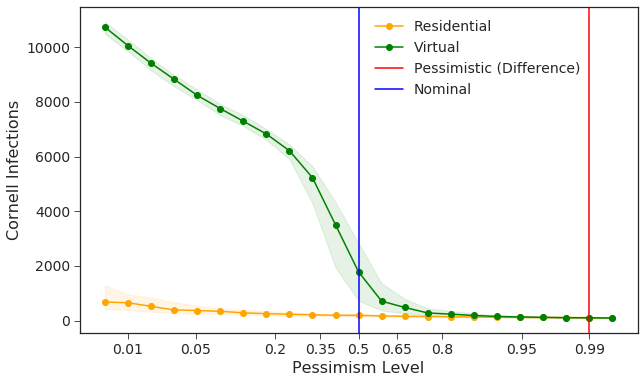

In [29]:
plt.figure(figsize=(10,6))

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('z-score', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')

plt.ylabel('Cornell Infections')
plt.xlabel('Pessimism Level')
# plt.title('Residential Pessimistic Scenario')

plt.axvline(norm.ppf(0.99), label='Pessimistic (Difference)', color='red')
plt.axvline(0, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')
plotting_quantiles = [0.01, 0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 0.99]
plt.xticks([norm.ppf(x) for x in plotting_quantiles], plotting_quantiles)

plt.legend(frameon = False, loc='upper right', bbox_to_anchor=(0.92, 1))

plt.show()

# Combining Both Pessimistic Scenarios on same graph

In [5]:
res_pess_sens_sim_files = []
for i in np.linspace(-1.1, 1.1, 23):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/pess_res_sensitivity_sims_1624479651/pess_sensitivity/mult_{}.dill'.format(i)
    res_pess_sens_sim_files.append(fname)

res_pess_sensitivity_data = load_sim_output(res_pess_sens_sim_files)
res_pess_sensitivity_data['mult'] = np.linspace(-1.1, 1.1, 23)
res_pess_sensitivity_data['z-score'] = [norm.ppf(0.99) * x for x in np.linspace(-1.1, 1.1, 23)]
res_pess_sensitivity_data['quantile'] = [norm.cdf(norm.ppf(0.99) * x) for x in np.linspace(-1.1, 1.1, 23)]
# res_pess_sensitivity_data

In [7]:
res_vir_pess_sens_sim_files = []
for i in np.linspace(-1.1, 1.1, 23):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/pess_res-vir_sensitivity_sims_1624479636/pess_sensitivity/mult_{}.dill'.format(i)
    res_vir_pess_sens_sim_files.append(fname)

res_vir_pess_sensitivity_data = load_sim_output(res_vir_pess_sens_sim_files)
res_vir_pess_sensitivity_data['mult'] = np.linspace(-1.1, 1.1, 23)
res_vir_pess_sensitivity_data['z-score'] = [norm.ppf(0.99) * x for x in np.linspace(-1.1, 1.1, 23)]
res_vir_pess_sensitivity_data['quantile'] = [norm.cdf(norm.ppf(0.99) * x) for x in np.linspace(-1.1, 1.1, 23)]
# res-vir_pess_sensitivity_data

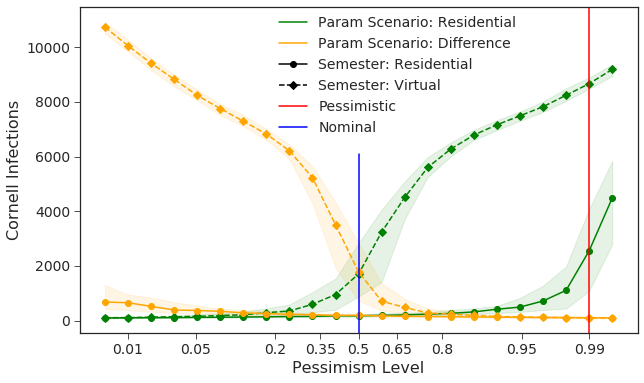

In [115]:
plt.figure(figsize=(10,6))
ax = plt.gca()

# Green: residential scenario, # Orange: Res - Virtual pessimistic scenario
# marker style, line style

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=res_pess_sensitivity_data, color='green', label='Residential Pess')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=res_pess_sensitivity_data, color='green')

plt.plot('z-score', 'vir_cornell_inf_50', marker='D', data=res_pess_sensitivity_data, color='green', linestyle='--')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=res_pess_sensitivity_data, color='green')

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=res_vir_pess_sensitivity_data, color='orange', label='Difference Pess')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=res_vir_pess_sensitivity_data, color='orange')

plt.plot('z-score', 'vir_cornell_inf_50', marker='D', data=res_vir_pess_sensitivity_data, color='orange', linestyle='--')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=res_vir_pess_sensitivity_data, color='orange')

# Dummy lines
h1, = plt.plot([],[], c='green', label='Param Scenario: Residential')
h2, = plt.plot([],[], c='orange', label='Param Scenario: Difference')
h3, = plt.plot([],[], c="black", linestyle='-', marker='o', label='Semester: Residential')
h4, = ax.plot([],[], c="black", linestyle='--', marker='D', label='Semester: Virtual')

plt.ylabel('Cornell Infections')
plt.xlabel('Pessimism Level')
# plt.title('Residential Pessimistic Scenario')

h5 = plt.axvline(norm.ppf(0.99), label='Pessimistic', color='red')
h6 = plt.axvline(0, ymin=0, ymax=0.55, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')
plotting_quantiles = [0.01, 0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 0.99]
plt.xticks([norm.ppf(x) for x in plotting_quantiles], plotting_quantiles)

plt.legend(handles=[h1, h2, h3, h4, h5, h6], bbox_to_anchor=(0.57, 0.57))
# plt.legend(handles=[h1, h2, h3, h4, h5, h6], loc='upper center')
# plt.show()
plt.savefig('high_res_figs/fig3/scenarios_inf_sensitivity.pdf', format='pdf')

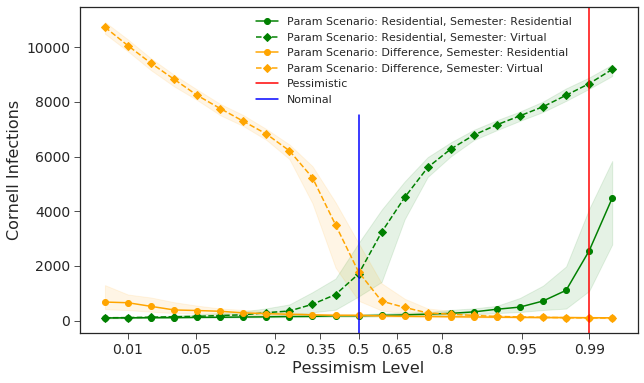

In [114]:
plt.figure(figsize=(10,6))
ax = plt.gca()

# Green: residential scenario, # Orange: Res - Virtual pessimistic scenario
# marker style, line style

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=res_pess_sensitivity_data, color='green', label='Param Scenario: Residential, Semester: Residential')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=res_pess_sensitivity_data, color='green')

plt.plot('z-score', 'vir_cornell_inf_50', marker='D', data=res_pess_sensitivity_data, color='green', linestyle='--', label='Param Scenario: Residential, Semester: Virtual')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=res_pess_sensitivity_data, color='green')

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=res_vir_pess_sensitivity_data, color='orange', label='Param Scenario: Difference, Semester: Residential')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=res_vir_pess_sensitivity_data, color='orange')

plt.plot('z-score', 'vir_cornell_inf_50', marker='D', data=res_vir_pess_sensitivity_data, color='orange', linestyle='--', label='Param Scenario: Difference, Semester: Virtual')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=res_vir_pess_sensitivity_data, color='orange')

# Dummy lines
# h1, = plt.plot([],[], c='green', label='Param Scenario: Residential')
# h2, = plt.plot([],[], c='orange', label='Param Scenario: Difference')
# h3, = plt.plot([],[], c="black", linestyle='-', marker='o', label='Semester: Residential')
# h4, = ax.plot([],[], c="black", linestyle='--', marker='D', label='Semester: Virtual')

plt.ylabel('Cornell Infections')
plt.xlabel('Pessimism Level')
# plt.title('Residential Pessimistic Scenario')

h5 = plt.axvline(norm.ppf(0.99), label='Pessimistic', color='red')
h6 = plt.axvline(0, ymin=0, ymax=0.67, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')
plotting_quantiles = [0.01, 0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 0.99]
plt.xticks([norm.ppf(x) for x in plotting_quantiles], plotting_quantiles)

plt.legend(bbox_to_anchor=(0.9, 1), loc='upper right', fontsize=11)
# plt.legend(handles=[h1, h2, h3, h4, h5, h6], loc='upper center')
plt.show()

In [ ]:
# need res_pessimistic point in LHS space
# find direction, generate all LHS points
# use this function: run_parallel_sims_lhs_space

In [ ]:
def get_direction(pess, centre):
    direction = dict()
    for param in centre.keys():
        direction[param] = pess[param] - centre[param]

def generate_new_params(centre, direction, mult):
    new_params = dict()
    for param in centre.keys():
        new_params[param] = centre[param] + mult * direction[param]

In [5]:
res_pessimistic

{'ct_testing_ratio': 0.8408882933907234,
 'Sy_time': 11.99746235017504,
 'E_time': 1.9781058849148883,
 'ct_mult': 1.3162323939656828,
 'test_sensitivity': 0.5210403803934799,
 'outside_inf_mult': 1.0241384070908395,
 'test_noncompliance': 0.10516921933568771,
 'ID_time': 3.1001602001643,
 'R0': 3.525611538430936,
 'asymp_prob_mult': 1.1522097816900696,
 'inital_prev_mult': 1.0513769799456973,
 'daily_self_report_prob': 0.34639409513141284,
 'virtual_noncompliance': 0.5,
 'intermittent_non-compliance': 0.5,
 'virtual_r0_mult': 0.97,
 'virtual_pop_size': 0.5}

In [7]:
centre = get_centre_point()
centre

{'asymp_prob_mult': 1.0,
 'inital_prev_mult': 1.0,
 'R0': 2.5,
 'outside_inf_mult': 1.0,
 'daily_self_report_prob': 0.36,
 'ct_mult': 1.5,
 'ct_testing_ratio': 1.0,
 'test_sensitivity': 0.6000000000000001,
 'test_noncompliance': 0.1,
 'E_time': 2.0,
 'ID_time': 3.0,
 'Sy_time': 12.0,
 'virtual_noncompliance': 0.5,
 'intermittent_non-compliance': 0.5,
 'virtual_r0_mult': 1.2349999999999999,
 'virtual_pop_size': 0.5}

# Other graphs

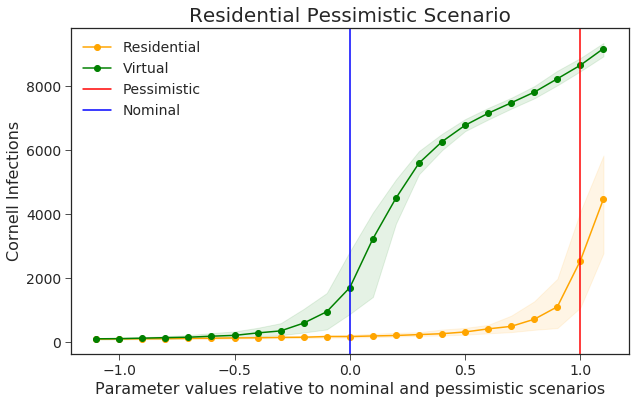

In [8]:
plt.figure(figsize=(10,6))

plt.plot('mult', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='mult', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('mult', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='mult', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')

plt.ylabel('Cornell Infections')
plt.xlabel('Parameter values relative to nominal and pessimistic scenarios')
plt.title('Residential Pessimistic Scenario')

plt.axvline(1, label='Pessimistic', color='red')
plt.axvline(0, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

#### Alternate x-axis for above plot

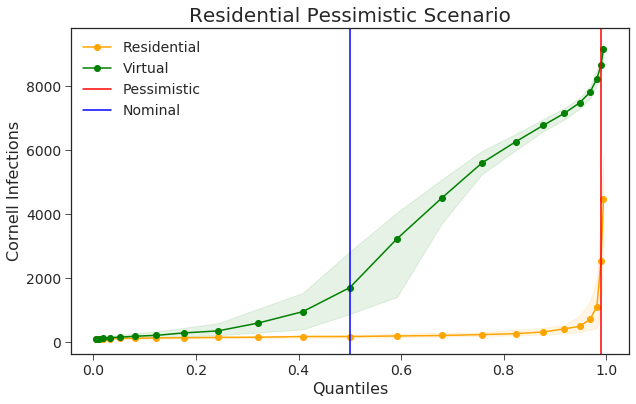

In [9]:
plt.figure(figsize=(10,6))

plt.plot('quantile', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='quantile', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('quantile', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='quantile', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')

plt.ylabel('Cornell Infections')
plt.xlabel('Quantiles')
plt.title('Residential Pessimistic Scenario')

plt.axvline(0.99, label='Pessimistic', color='red')
plt.axvline(0.5, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

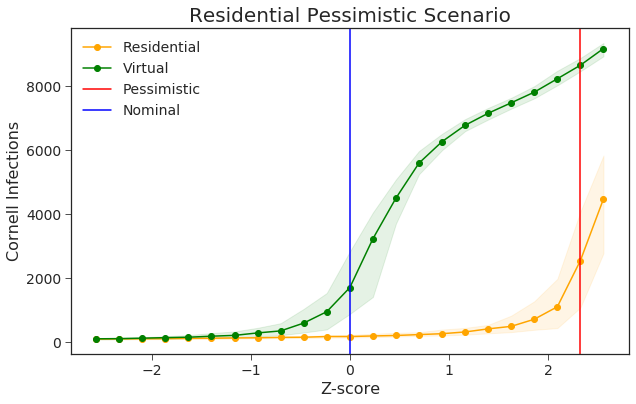

In [10]:
plt.figure(figsize=(10,6))

plt.plot('z-score', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='z-score', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('z-score', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='z-score', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')

plt.ylabel('Cornell Infections')
plt.xlabel('Z-score')
plt.title('Residential Pessimistic Scenario')

plt.axvline(norm.ppf(0.99), label='Pessimistic', color='red')
plt.axvline(0, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

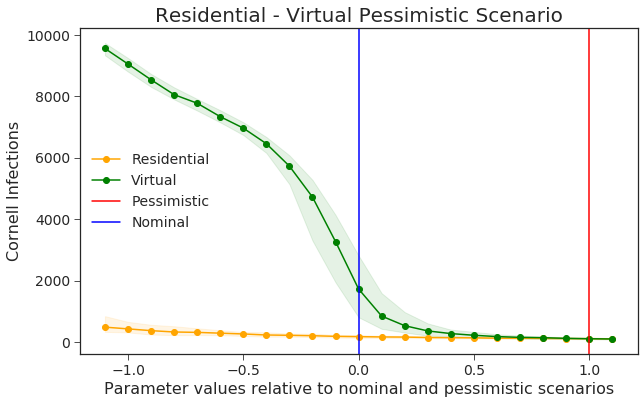

In [12]:
plt.figure(figsize=(10,6))

plt.plot('mult', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='mult', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('mult', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='mult', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')
plt.ylabel('Cornell Infections')
plt.xlabel('Parameter values relative to nominal and pessimistic scenarios')
plt.title('Residential - Virtual Pessimistic Scenario')

plt.axvline(1, label='Pessimistic', color='red')
plt.axvline(0, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

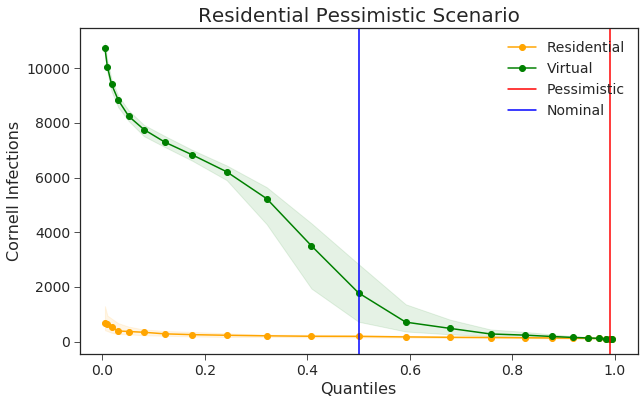

In [13]:
plt.figure(figsize=(10,6))

plt.plot('quantile', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='quantile', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('quantile', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='quantile', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')

plt.ylabel('Cornell Infections')
plt.xlabel('Quantiles')
plt.title('Residential Pessimistic Scenario')

plt.axvline(0.99, label='Pessimistic', color='red')
plt.axvline(0.5, label='Nominal', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

#### Old Residential Pessimistic

In [21]:
lhs_output_sim_files_old = []
for i in range(2000):
    fname = '/home/aaj54/group-testing/notebooks/apr_24_scenarios/point_{}.dill'.format(i)
    lhs_output_sim_files_old.append(fname)

scenario_data_old = load_lhs_output(lhs_output_sim_files_old)
res_results_old = residential_regression(scenario_data_old)
res_pessimistic_old = calculate_pessimistic_scenario(res_results_old)

In [19]:
def normalize_param(param_name, value):
    lower_bound = PARAM_BOUNDS[param_name][0]
    upper_bound = PARAM_BOUNDS[param_name][1]
    return (value - lower_bound) / (upper_bound - lower_bound)

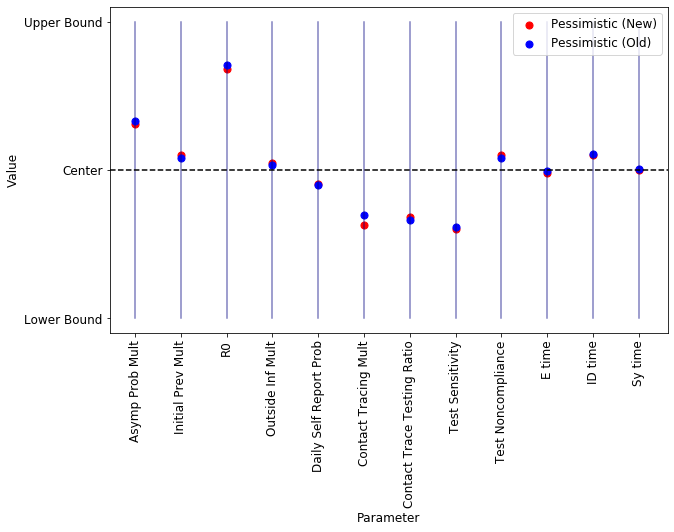

In [22]:
plt.figure(figsize=(10,6))
label = True

for index, param in enumerate(UNCERTAINTY_PARAMS_LIST[:12]):
    plt.plot([index, index], [0,1], color='navy', alpha=0.5)
    if label == True:
        plt.scatter(index, normalize_param(param, res_pessimistic[param]), color='red', label='Pessimistic (New)', s=50)
        plt.scatter(index, normalize_param(param, res_pessimistic_old[param]), color='blue', label='Pessimistic (Old)', s=50)
        label = False
    else:
        plt.scatter(index, normalize_param(param, res_pessimistic[param]), color='red', s=50)
        plt.scatter(index, normalize_param(param, res_pessimistic_old[param]), color='blue', s=50)

plt.axhline(0.5, color='black', ls='--')

plt.xticks(list(range(len(UNCERTAINTY_PARAMS_LIST[:12]))), ['Asymp Prob Mult', 'Initial Prev Mult', 'R0', 'Outside Inf Mult',
                                          'Daily Self Report Prob', 'Contact Tracing Mult', 'Contact Trace Testing Ratio',
                                          'Test Sensitivity', 'Test Noncompliance', 'E time', 'ID time', 'Sy time'])
plt.xticks(rotation = 90)
plt.yticks([0,0.5,1], ['Lower Bound', 'Center', 'Upper Bound'])

plt.xlabel('Parameter')
plt.ylabel('Value')

plt.legend(loc='upper right')
plt.show()